In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Descarga set de datos de MNIST (Numeros escritos a mano y etiquetados)
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

# Obtener las variables separadas los datos de entrenamiento y los datos de prueba
datos_entrenamiento, datos_pruebas = datos["train"], datos["test"]

# Funcion de normalizacion para los datos(from 0-255 to 0-1)
# (Hace que la red aprenda mejor y mas rapido)
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255 # Aqui se pasa de 0-255 a 0-1
    return imagenes, etiquetas

# Normalizar los datos de entrenamiento
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

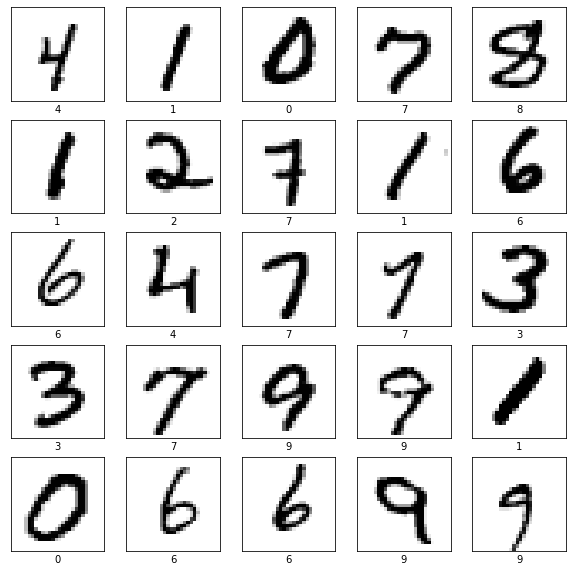

In [14]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])

plt.show()  

In [16]:
# Crear el modelo (Modelo denso, regular, sin redes convolucionales todavia)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # 1 = blanco y negro
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    # Este es el orden en que se distribuyen las capas de entrada, ocultas y de salida
])

# Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [17]:
# Los numeros de datos de entrenamiento y pruebas (60k y 10k)
num_datos_entrenamiento = metadatos.splits['train'].num_examples
num_datos_pruebas =  metadatos.splits['test'].num_examples

# Trabajar por lotes
TAMANO_LOTE = 32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria
#para que el entrenamiento no se aprenda las cosas en orden
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [18]:
#Realizar el entrenamiento
import math

historial = modelo.fit(
    datos_entrenamiento,
    epochs = 60,
    steps_per_epoch = math.ceil(num_datos_entrenamiento/TAMANO_LOTE) 
)

Epoch 1/60
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2975 - accuracy: 0.9148
Epoch 2/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1397 - accuracy: 0.9581
Epoch 3/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1017 - accuracy: 0.9689
Epoch 4/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9729
Epoch 5/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0690 - accuracy: 0.9787
Epoch 6/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0584 - accuracy: 0.9816
Epoch 7/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0538 - accuracy: 0.9831
Epoch 8/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0490 - accuracy: 0.9839
Epoch 9/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0423 - accuracy: 0.9865
Epoch 10/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

In [19]:
#Exportar el modelo al explorador! (Mas detalle de esto en en mi video de exportacion: https://youtu.be/JpE4bYyRADI )
modelo.save('numeros_regular.h5')

#Convertirlo a tensorflow.js
!mkdir carpeta_salida_1

!"C:\Users\fabian\AppData\Roaming\Python\Python310\Scripts\tensorflowjs_converter" --input_format keras numeros_regular.h5 carpeta_salida_1

2022-04-14 11:09:24.640679: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-14 11:09:24.641085: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
